<a href="https://colab.research.google.com/github/SK25397938/FUTURE_DS_03/blob/main/Copy_of_Untitled13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Student Feedback Analysis and Satisfaction Improvement Study***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

In [ ]:
!pip install textblob


In [ ]:
df = pd.read_csv("student_feedback.csv")
df.head()


,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Unnamed: 0                                            1001 non-null   int64
 1   Student ID                                            1001 non-null   int64
 2   Well versed with the subject                          1001 non-null   int64
 3   Explains concepts in an understandable way            1001 non-null   int64
 4   Use of presentations                                  1001 non-null   int64
 5   Degree of difficulty of assignments                   1001 non-null   int64
 6   Solves doubts willingly                               1001 non-null   int64
 7   Structuring of the course                             1001 non-null   int64
 8   Provides support for students going above and beyond  1001 non-null   int64
 9

In [ ]:
df.isnull().sum()


,0
Unnamed: 0,0
Student ID,0
Well versed with the subject,0
Explains concepts in an understandable way,0
Use of presentations,0
Degree of difficulty of assignments,0
Solves doubts willingly,0
Structuring of the course,0
Provides support for students going above and beyond,0
Course recommendation based on relevance,0


In [ ]:
df.set_index("Unnamed: 0", inplace=True)


In [ ]:
df.index.name = "Response No"
df.head()


,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
Response No,,,,,,,,,
0,340,5,2,7,6,9,2,1,8
1,253,6,5,8,6,2,1,2,9
2,680,7,7,6,5,4,2,3,1
3,806,9,6,7,1,5,9,4,6
4,632,8,10,8,4,6,6,9,9


In [ ]:
rating_cols = df.columns.drop("Student ID")
avg_ratings = df[rating_cols].mean().sort_values(ascending=False)
avg_ratings


,0
Well versed with the subject,7.497502
Explains concepts in an understandable way,6.081918
Use of presentations,5.942058
Provides support for students going above and beyond,5.662338
Structuring of the course,5.636364
Course recommendation based on relevance,5.598402
Solves doubts willingly,5.474525
Degree of difficulty of assignments,5.430569


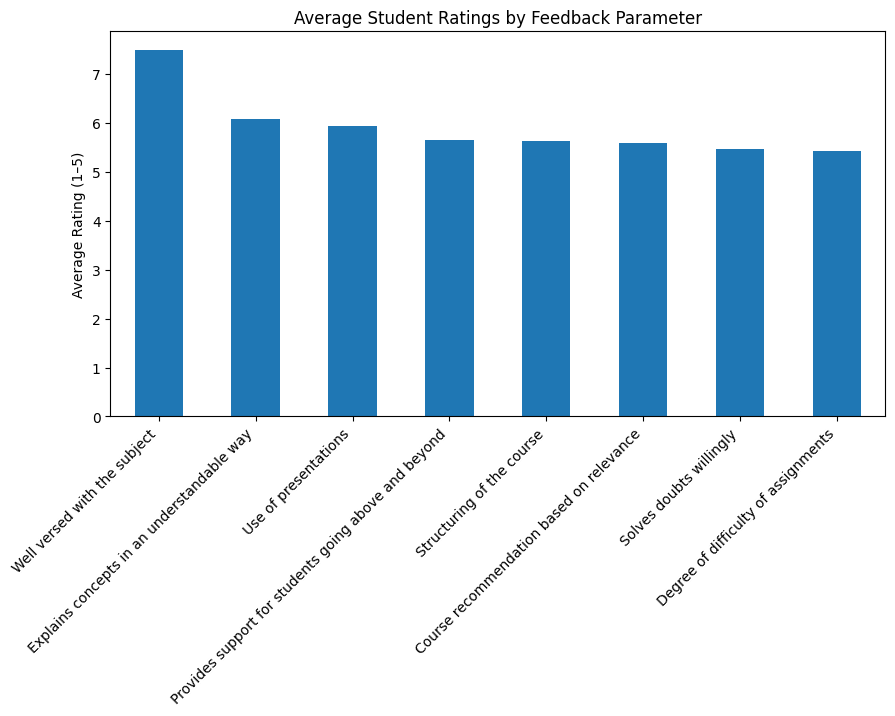

In [ ]:
plt.figure(figsize=(10,5))
avg_ratings.plot(kind="bar")
plt.title("Average Student Ratings by Feedback Parameter")
plt.ylabel("Average Rating (1–5)")
plt.xticks(rotation=45, ha="right")
plt.show()

In [ ]:
df["Overall Satisfaction"] = df[rating_cols].mean(axis=1)
def satisfaction(score):
    if score >= 4:
        return "High"
    elif score >= 3:
        return "Medium"
    else:
        return "Low"

df["Satisfaction Level"] = df["Overall Satisfaction"].apply(satisfaction)
df["Satisfaction Level"].value_counts()



,count
Satisfaction Level,
High,991
Medium,10


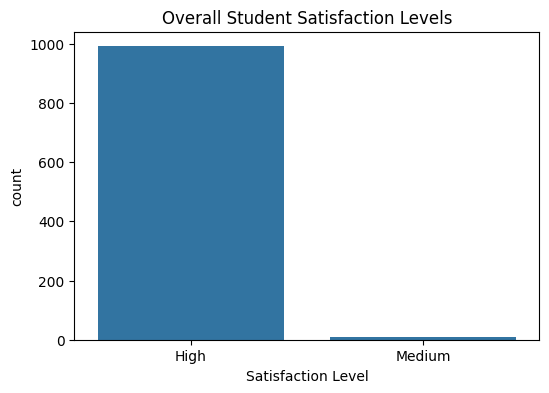

In [ ]:

plt.figure(figsize=(6,4))
sns.countplot(x="Satisfaction Level", data=df)
plt.title("Overall Student Satisfaction Levels")
plt.show()


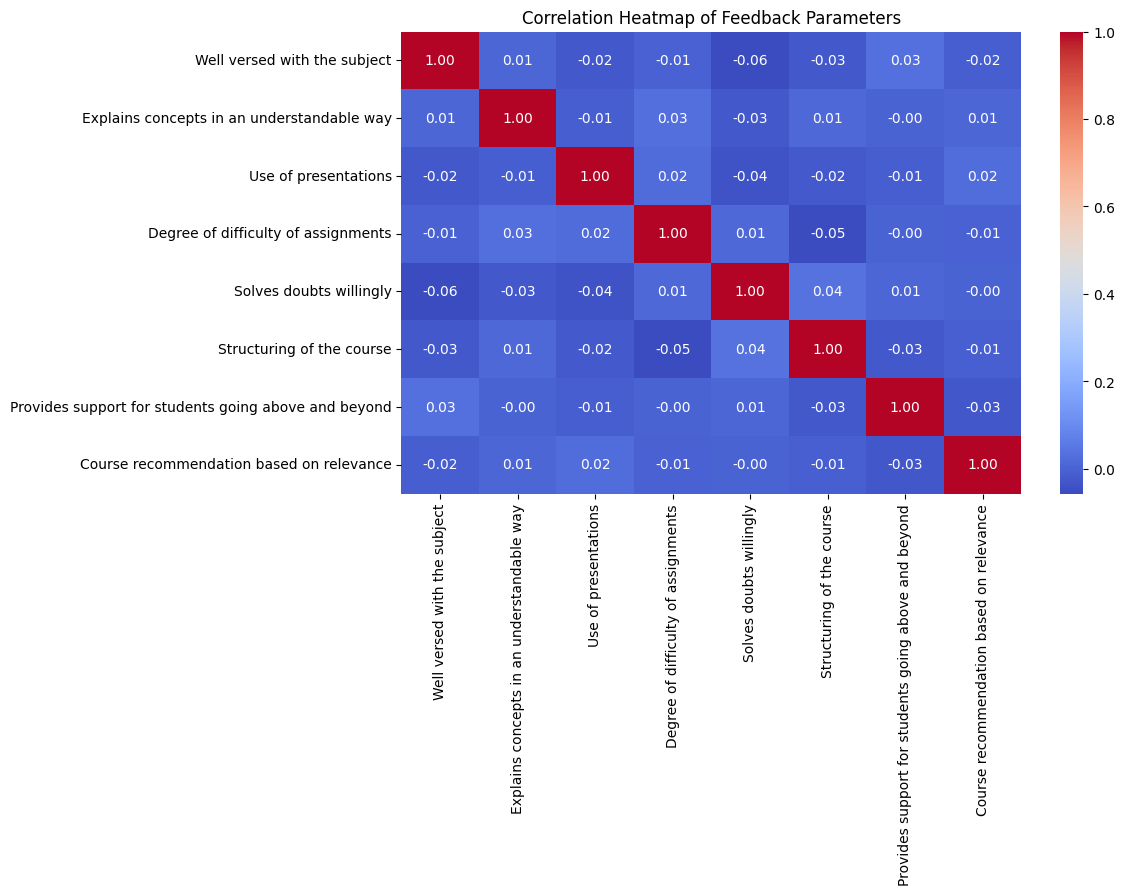

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(
    df[rating_cols].corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Heatmap of Feedback Parameters")
plt.show()


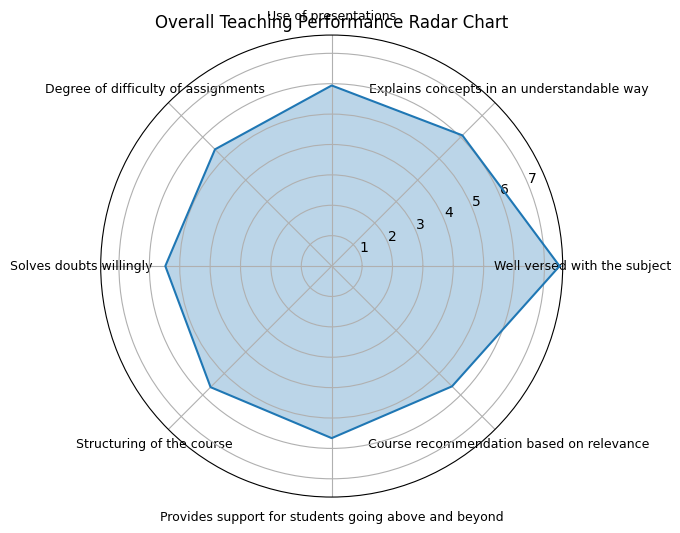

In [ ]:

labels = rating_cols.tolist()
values = df[rating_cols].mean().values
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
values = np.concatenate((values, [values[0]]))
angles = np.concatenate((angles, [angles[0]]))
plt.figure(figsize=(6,6))
plt.polar(angles, values)
plt.fill(angles, values, alpha=0.3)
plt.xticks(angles[:-1], labels, fontsize=9)
plt.title("Overall Teaching Performance Radar Chart")
plt.show()


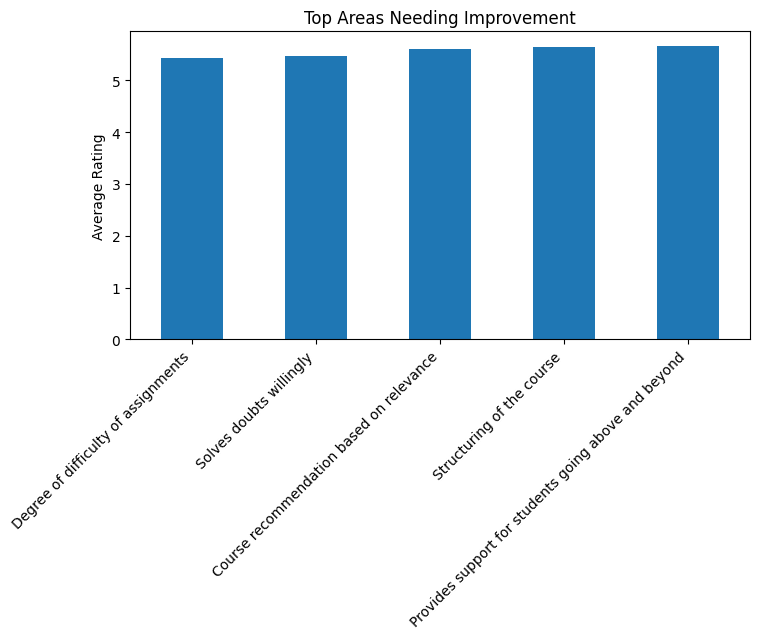

In [ ]:
lowest = avg_ratings.sort_values().head(5)
plt.figure(figsize=(8,4))
lowest.plot(kind="bar")
plt.title("Top Areas Needing Improvement")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, ha="right")
plt.show()


In [ ]:
improvement_areas = avg_ratings.sort_values().head(5)
improvement_areas


,0
Degree of difficulty of assignments,5.430569
Solves doubts willingly,5.474525
Course recommendation based on relevance,5.598402
Structuring of the course,5.636364
Provides support for students going above and beyond,5.662338


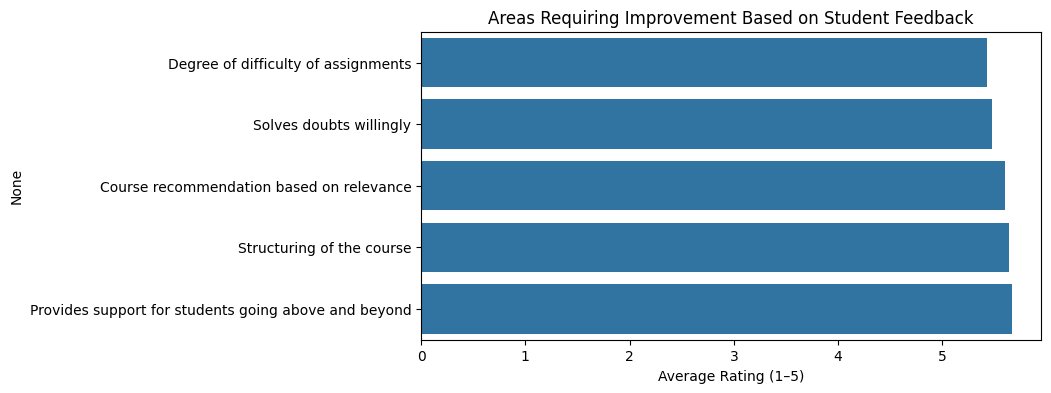

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(
    x=improvement_areas.values,
    y=improvement_areas.index
)
plt.title("Areas Requiring Improvement Based on Student Feedback")
plt.xlabel("Average Rating (1–5)")
plt.show()


In [ ]:
improvement_plan = pd.DataFrame({
    "Feedback Area": improvement_areas.index,
    "Average Rating": improvement_areas.values,
    "Suggested Improvement": [
        "Provide clearer assignment guidelines",
        "Increase interactive teaching sessions",
        "Improve course structure and pacing",
        "Offer additional student support sessions",
        "Enhance use of visual teaching aids"
    ]
})
improvement_plan

,Feedback Area,Average Rating,Suggested Improvement
0,Degree of difficulty of assignments,5.430569,Provide clearer assignment guidelines
1,Solves doubts willingly,5.474525,Increase interactive teaching sessions
2,Course recommendation based on relevance,5.598402,Improve course structure and pacing
3,Structuring of the course,5.636364,Offer additional student support sessions
4,Provides support for students going above and ...,5.662338,Enhance use of visual teaching aids
